Keep in mind that
- GalaxyID is not the merger tree index. GalaxyID starts from 1. The index in merger tree file is GalaxyID - 1.
- SOAPID is the SOAP catalogue index, which begins from 0.

The object is to find the main progenitors

**1. The same topleafid identification**

In [20]:
import h5py

with h5py.File('/cosma8/data/dp004/jch/FLAMINGO/MergerTrees/ScienceRuns/L1000N1800/HYDRO_FIDUCIAL/trees_f0.1_min10_max100/vr_trees.hdf5') as f:
    galaxy_ids0 = f['SOAP/Snapshot0077'][:]
    galaxy_ids1 = f['SOAP/Snapshot0076'][:]
    topleaf_ids0 = f['MergerTree/TopLeafID'][:][galaxy_ids0]
    topleaf_ids1 = f['MergerTree/TopLeafID'][:][galaxy_ids1]

    massfof = f['Subhalo/Mass_tot'][:] * 1e10 # in Msun

In [23]:
len(galaxy_ids0), len(galaxy_ids1)

(13235708, 13440604)

In [21]:
import numpy as np
mask0 = np.isin(topleaf_ids0, topleaf_ids1) # the overlap mask
mask1 = np.isin(topleaf_ids1, topleaf_ids0)
match_galaxy_ids0 = galaxy_ids0[mask0]
match_galaxy_ids1 = galaxy_ids1[mask1]
print(len(match_galaxy_ids0))
print(match_galaxy_ids0, match_galaxy_ids1)

12057152
[593493536 597171408 761514312 ... 811366459 602420603 277416279] [593493537 597171409 761514313 ... 476373886 673338780 846074756]


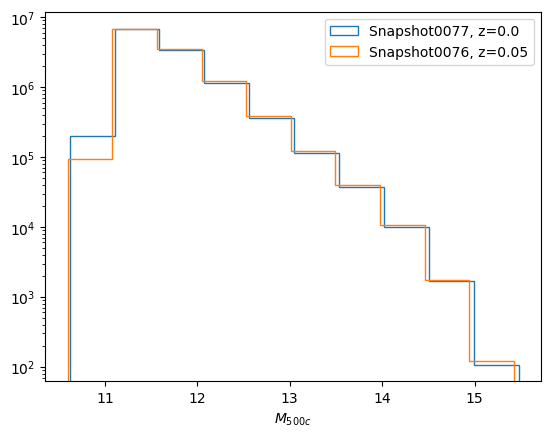

In [22]:
import matplotlib.pyplot as plt

mass0 = massfof[match_galaxy_ids0]
mass1 = massfof[match_galaxy_ids1]
plt.hist(np.log10(mass0), log=True, histtype='step', label='Snapshot0077, z=0.0')
plt.hist(np.log10(mass1), log=True, histtype='step', label='Snapshot0076, z=0.05')
plt.xlabel('$M_{{500c}}$')
plt.legend()
plt.show()

**2. The progenitor identification**

In [24]:
import h5py

with h5py.File('/cosma8/data/dp004/jch/FLAMINGO/MergerTrees/ScienceRuns/L1000N1800/HYDRO_FIDUCIAL/trees_f0.1_min10_max100/vr_trees.hdf5') as f:
    galaxy_ids0 = f['SOAP/Snapshot0077'][:]
    galaxy_ids1 = f['SOAP/Snapshot0076'][:]
    lastprog_ids0 = f['MergerTree/LastProgID'][:][galaxy_ids0]
    # topleaf_ids1 = f['MergerTree/TopLeafID'][:][galaxy_ids1]


In [25]:
import numpy as np
mask = np.isin(lastprog_ids0, galaxy_ids1) # find the last progenitors that are in the previous snapshot
len(galaxy_ids0[mask])

0

**3.n+1?**

In [26]:
import h5py

with h5py.File('/cosma8/data/dp004/jch/FLAMINGO/MergerTrees/ScienceRuns/L1000N1800/HYDRO_FIDUCIAL/trees_f0.1_min10_max100/vr_trees.hdf5') as f:
    galaxy_ids0 = f['SOAP/Snapshot0077'][:]
    galaxy_ids1 = f['SOAP/Snapshot0076'][:]
    # topleaf_ids0 = f['MergerTree/TopLeafID'][:][galaxy_ids0 - 1]
    # topleaf_ids1 = f['MergerTree/TopLeafID'][:][galaxy_ids1 - 1]

    massfof = f['Subhalo/Mass_tot'][:] * 1e10 # in Msun

    

In [37]:
import numpy as np
with h5py.File('/cosma8/data/dp004/jch/FLAMINGO/MergerTrees/ScienceRuns/L1000N1800/HYDRO_FIDUCIAL/trees_f0.1_min10_max100/vr_trees.hdf5') as f:
    snapnum_prog0 = f['Subhalo/SnapNum'][:][galaxy_ids0 + 1]
    soapid = f['Subhalo/ID'][:][galaxy_ids0] - 1
    galaxy_ids00 = f['MergerTree/GalaxyID'][:][galaxy_ids0]
np.sum(snapnum_prog0 == 76)/len(snapnum_prog0)
mask = (snapnum_prog0 == 76)

In [38]:
print(galaxy_ids0, galaxy_ids00)

[593493536 597171408 761514312 ... 132434881 602420603 277416279] [593493537 597171409 761514313 ... 132434882 602420604 277416280]


12057152
12057152


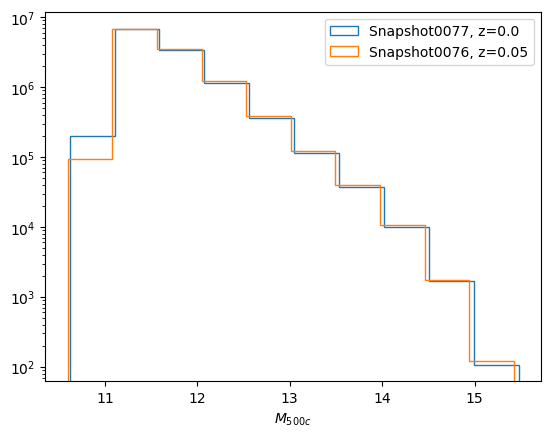

In [36]:
import matplotlib.pyplot as plt

mass0 = massfof[galaxy_ids0][mask]
print(len(mass0))
mass1 = massfof[galaxy_ids0 + 1][mask]
print(len(mass1))
plt.hist(np.log10(mass0), log=True, histtype='step', label='Snapshot0077, z=0.0')
plt.hist(np.log10(mass1), log=True, histtype='step', label='Snapshot0076, z=0.05')
plt.xlabel('$M_{{500c}}$')
plt.legend()
plt.show()